<a href="https://colab.research.google.com/github/rutujaahire/Airbnb-booking-analysis/blob/main/RutujaAhire_Airbnb_Bookings_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Loading The Data**

we used the Airbnb NYC 2019 dataset for booking analaysis of the same.Using pandas library we will load the CSV file and name the dataframe as airbnb_df

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/'
airbnb_df=pd.read_csv(file_path + 'Copy of Airbnb NYC 2019.csv')

# **Data Cleaning**

First we will get a quick summary of the airbnb dataset we have

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# we have some columns such as [name] and [last_review] which contain missing values and are pretty non_relevant for the data analysis.Hence,we have to get rid of such coulmns.


In [ ]:
airbnb_df.drop(['name','last_review'],axis=1,inplace=True)
airbnb_df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# The columns [host_name] and [reviews_per_month] have NaN values which we will replace

In [ ]:
airbnb_df.host_name.fillna('unavailable',inplace=True)
airbnb_df.reviews_per_month.fillna(0,inplace=True)
airbnb_df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# From above table we can see the airbnb dataset is free of NaN values. Now we can start exploring and visualizing the dataset.

# **Data Exploration and Visualization**



# 1.  What can we learn about different hosts and areas?



In [ ]:
host_areas = airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'],ascending = False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7479,Kazuya,Manhattan,103
7480,Kazuya,Queens,103
7478,Kazuya,Brooklyn,103
6540,Jeremy & Laura,Manhattan,96
13216,Sonder,Manhattan,96
2901,Corporate Housing,Manhattan,91


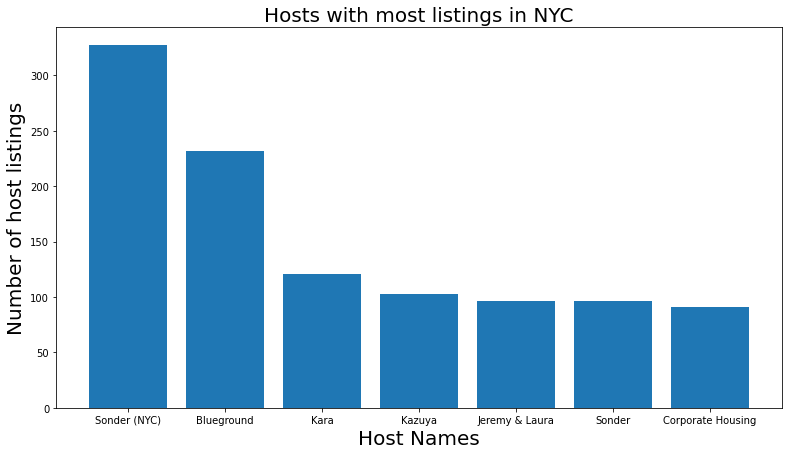

In [ ]:
plt.figure(figsize=(13,7))
host_name = top_hosts['host_name']
host_listing = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_listing)
plt.title('Hosts with most listings in NYC',{'fontsize':20})
plt.xlabel('Host Names',{'fontsize':20})
plt.ylabel('Number of host listings',{'fontsize':20})
plt.show()


# From the above bar graph and table, we can see that the name of the host with the most listings is Sonder(NYC) who has 327 listings in Manhattan


# What can we learn from predicitions?(ex:locations,prices,reviews,etc)



# **Neighbourhood Group**

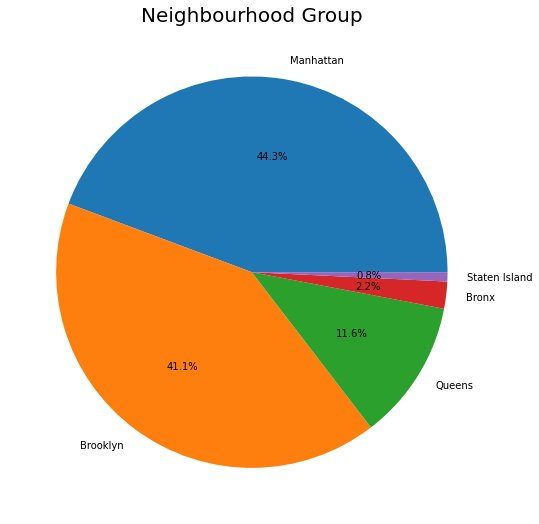

In [ ]:
plt.figure(figsize=(17,9))
plt.title("Neighbourhood Group",{'fontsize':20})
ng=plt.pie(airbnb_df.neighbourhood_group.value_counts(),labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%')
plt.show()

# The pie chart above shows that Airbnb Listings in NYC are near Manhattan and Brooklyn have the highest share of rental property. On the other side, Staten Island and Bronx have the lowest share of rental property.

In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# The statistics show us that the average rental price is $152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing.We also learn that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.

# **Neighbourhood Group Price Distribution**

# From the statistics we can see that maximum rental price is $10000 which is absurdly high and most probably skewed. Hence, we have to limit the price range to [price<500] in the scatter plot to get an accurate display of the price ranges in different nieghbourhoods.


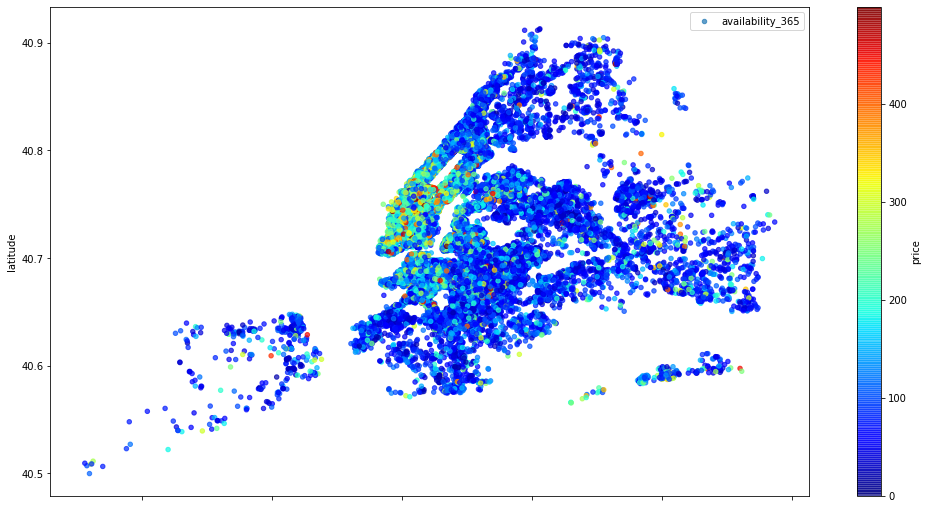

In [ ]:
ngm=airbnb_df[airbnb_df.price<500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'),alpha=0.7, figsize=(17,9))
ngm.legend()

# The information we got from the graph above is red color dots are the rooms with ahigher price and blue color dots are the rooms with a lower price.Also,we can see that Manhattan region has more expensive room price ranges.

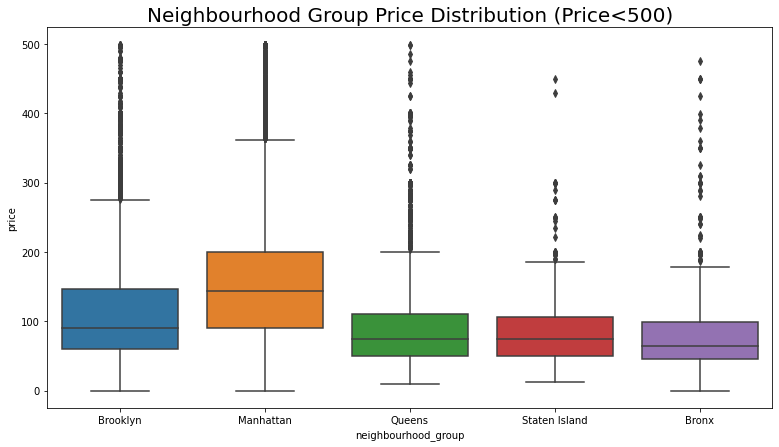

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution (Price<500)",{'fontsize':20})
sns.boxplot(y="price",x ='neighbourhood_group',data = airbnb_df[airbnb_df.price<500])
plt.show()

# From the boxplot above,we an definitely observe a couple of things about the distribution of prices for Airbnb in NYC.

# We can state that Manhattan has the highest range price for the listings with about 140 as an average price, followed by Brooklyn with 90 per night, 

# Queens and Staten Island seem to have a very similar distribution,

# Bronx is the cheapest.

# 3. Which hosts are the busiest and why?




# To find the busiest hosts we have to consider the [number_of_reviews] columns as the go to parameter as busy listings will get reviewed more often than other listings

In [ ]:
busiest_hosts = airbnb_df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
10310,Dona,47621202,Private room,Queens,629
17755,Jj,4734398,Private room,Manhattan,607
25626,Maya,37312959,Private room,Queens,543
6259,Carol,2369681,Private room,Manhattan,540
8973,Danielle,26432133,Private room,Queens,510
3966,Asa,12949460,Entire home/apt,Brooklyn,488
37830,Wanda,792159,Private room,Brooklyn,480
22556,Linda,2680820,Private room,Queens,474
8651,Dani,42273,Entire home/apt,Brooklyn,467
2953,Angela,23591164,Private room,Queens,466


<BarContainer object of 10 artists>

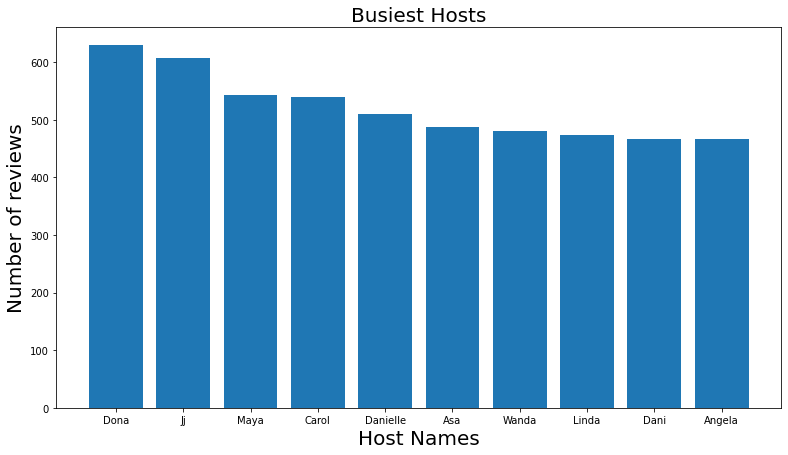

In [ ]:
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.figure(figsize=(13,7))
plt.title('Busiest Hosts',{'fontsize':20})
plt.xlabel('Host Names',{'fontsize':20})
plt.ylabel('Number of reviews',{'fontsize':20})
plt.bar(host_name,reviews)

# from the above graph and table we can see that the top 3 busiest hosts are Dona from Queens,Ji from Manhattan and Maya from Queens

# 4. which room type is preferred in most popular neighbourhood?

# **Room Details**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


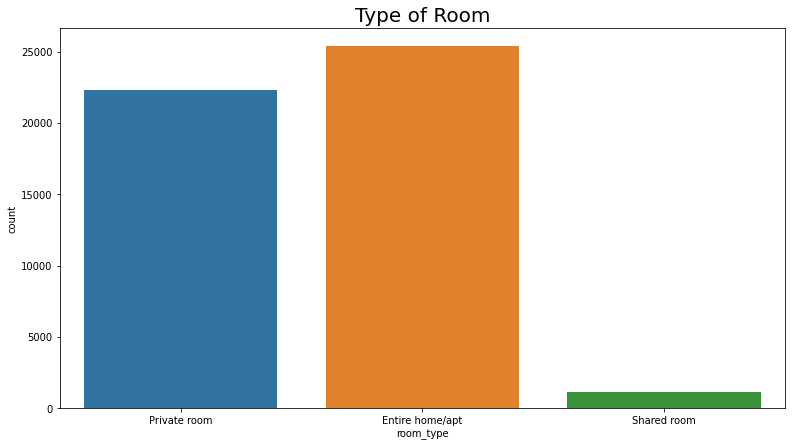

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Type of Room",{'fontsize':20})
sns.countplot(airbnb_df.room_type)
plt.show()

# We can see that the Entire Home/Apartment is highly preferred by guests, followed by the Private Room,and the least preferred one is Shared Room.

# Let's see room types occupied by different neighbourhood groups.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


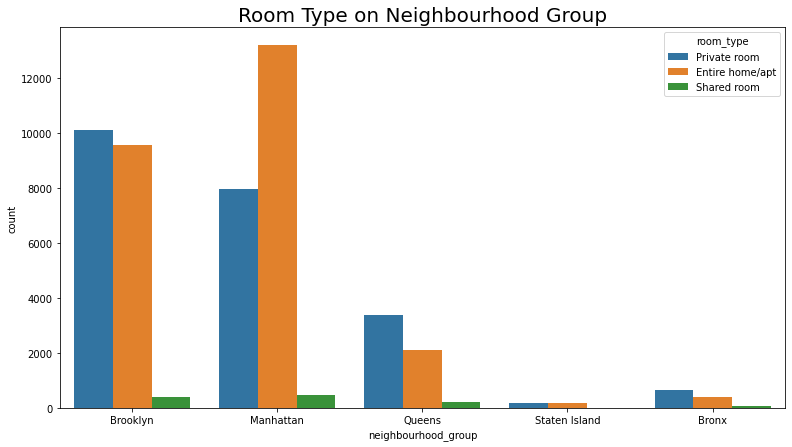

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group", {'fontsize':20})
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type)
plt.show()

# The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartment Near Brooklyn are Nearly equal.

5. Is there any noticeacle difference of traffic among different areas, what could be the reason for it?

# **Neighbourhood Group vs Availability Room**

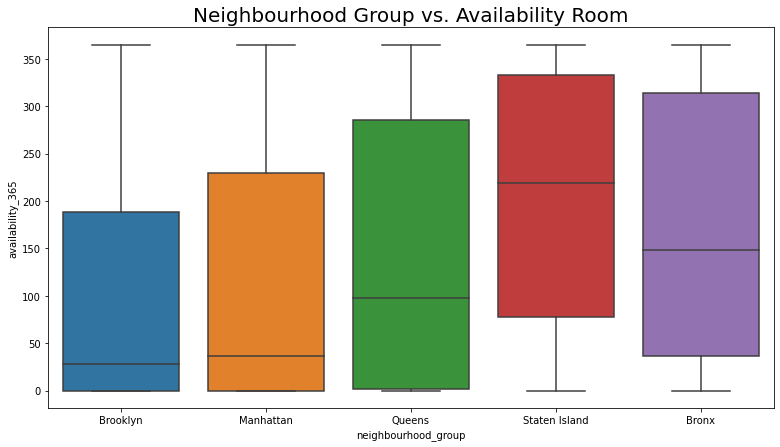

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room", {'fontsize':20})
sns.boxplot(data=airbnb_df, x='neighbourhood_group', y='availability_365')
plt.show()

# The graph above shows the relationship between the availability room and neighbourhood group.

# **Neighbourhood Popularity**

In [ ]:
airbnb_df1 = airbnb_df.groupby(['neighbourhood'])['id'].count().nlargest(10)
airbnb_df1

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: id, dtype: int64

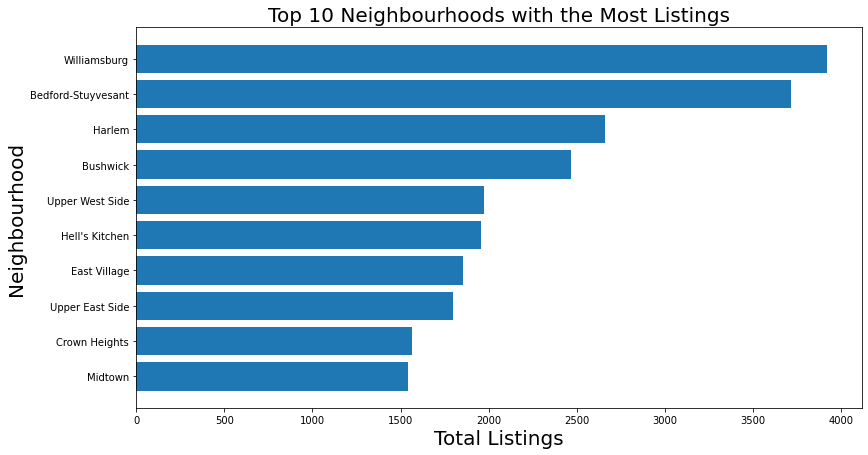

In [ ]:
plt.figure(figsize=(13,7))
x = list(airbnb_df1.index)
y = list(airbnb_df1.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighbourhoods with the Most Listings", {'fontsize':20})
plt.ylabel("Neighbourhood", {'fontsize':20})
plt.xlabel("Total Listings", {'fontsize':20})

plt.barh(x, y)
plt.show()


# The neighbourhoods with the most listings are in Manhattan and Brooklyn. Williamsburg, in Brooklyn, appears first with 3920 listingd. In Manhattan, Harlem has the most listings which is 2658

In [ ]:
airbnb_df.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews',ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
398,Queens,Jamaica,Private room,629
273,Manhattan,Harlem,Private room,607
369,Queens,East Elmhurst,Private room,543
288,Manhattan,Lower East Side,Private room,540
214,Brooklyn,Park Slope,Entire home/apt,488
146,Brooklyn,Bushwick,Private room,480
379,Queens,Flushing,Private room,474
230,Brooklyn,South Slope,Entire home/apt,467
399,Queens,Jamaica,Shared room,454
259,Manhattan,East Village,Private room,451


# The Top 3 most popular neighbourhoods are Jamaica in Queens, Harlem in Manhattan and East Elhurst in Queens.The most popular room type in these neighbourhoods is Private room.

# **Key Findings:**

# 1. Manhattan has the biggest share from total listings and the hosts which have the most number if listings are also from Manhattan.This is followed by Brooklyn and Queens.Staten Island has the least number of listings.

# 2.Manhattan and Brooklyn together have a 85% share out of total airbnb listings.Manhattan has the largest Variation in rental prices and also the most expensives ones

# 3.The busiesthosts are from Manhattan and Queens with Private room as the busiest room type for those hosts

# 4.Entire Home/Apartment is highly preferred by guests,followed by Private room.Shared room is the least preferred one. Manhattan has the most number of Entire Home/Apartments and Private rooms is almost equal.

# 5.The most reviewed neighbourhoods are Harlem in Manhattan and Jamaica, East Elmhurst in Queens. The most preferred room type in these neighbourhoods is Private room.